<h2>UK court martial data from 2010 to 2019, exploritory analysis<h2>

In [1]:
# importing libraries

# Array handling
import numpy as np

# Dataframe and csv handling
import pandas as pd

# Graph and chart creation
import seaborn as sns
sns.set_theme(style="darkgrid")

In [2]:
# import the csv file to a pandas dataframe and take a look at the first 5 rows

df = pd.read_csv('court_martial_dataframe.csv')

df.head()

,Rank,Service,Sentencing Date,Charge (s),Finding,Sentence
0,Signaller,Army,2010-01-07,"2 x Battery, 1 x Assault Occasioning Actual Bo...","1 x Not Guilty, 2 x Guilty",Admonished
1,Guardsman,Army,2010-01-13,1 x Absence Without Leave,Guilty,8 months detention
2,Signaller,Army,2010-01-13,1 x Absence Without Leave,Guilty,6 months detention
3,Guardsman,Army,2010-01-21,"1 x Desertion, 1 x Absence Without Leave","Not Guilty, Guilty",6 months detention
4,Gunner,Army,2010-01-22,4 x Absence Without Leave,Guilty,120 days detention


<b>Dataset features<b>

In [3]:
# Create a column list to be presented

column_list = []

# Add each column to the list

for column in df.columns:
    column_list.append(column)
    
print('The columns (features) of the data set are: \n {}'.format(column_list))

The columns (features) of the data set are: 
 ['Rank', 'Service', 'Sentencing Date', 'Charge (s)', 'Finding', 'Sentence']


<b>Dataset size

In [4]:
print('There are a total of {} court martials (rows) in the dataset.'.format(df.shape[0]))

There are a total of 4851 court martials (rows) in the dataset.


<b>Number of unique ranks

In [5]:
print('There are a total of {} unique ranks in the dataset.'.format(len(df['Rank'].unique())))

There are a total of 338 unique ranks in the dataset.


<b>Most court martialed ranks

In [6]:
print('The top 10 most court maritaled ranks are:\n')
df['Rank'].value_counts().head(10)

The top 10 most court maritaled ranks are:



Private           901
Lance Corporal    493
Corporal          482
Sergeant          232
Rifleman          167
Fusilier          166
Trooper           157
Gunner            151
Sapper            150
Guardsman         140
Name: Rank, dtype: int64

<b>Number of court martials by service

In [7]:
print('The number of cases by service are:')
df['Service'].value_counts()

The number of cases by service are:


Army        3894
Navy         488
RAF          313
Civilian      83
Marines       67
Name: Service, dtype: int64

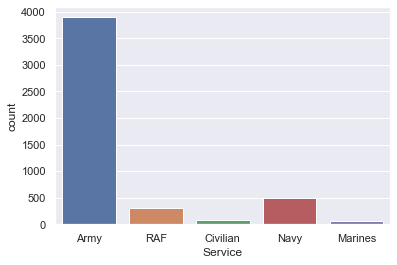

In [8]:
ax = sns.countplot(x=df["Service"])

<b>By service as a percent (not including civilians)

In [9]:
print('The number of cases by service as a percent are:')
cases_series = df['Service'].value_counts().drop(labels = ['Civilian'])

# Convert to a percent

cases_series = (cases_series/df['Service'].value_counts().sum())*100
cases_series

The number of cases by service as a percent are:


Army       80.371517
Navy       10.072239
RAF         6.460268
Marines     1.382869
Name: Service, dtype: float64

<b>Comparison of court martial cases with number of personnel per service</b>

It would be nice to compare these to the actual amount of personnel (as a percent) that each service contributes to the armed forces.

We can find the proportion of each service to the total armed forces here:

https://www.statista.com/statistics/579991/number-of-uk-armed-forces-by-military-branch/

In [10]:
# Using the personnel figures from 2015
Total_personnel = 153.73
Service_personnel = {'Service': ['Army', 'Navy', 'RAF', 'Marines'], 'Personnel':[87.06, 25.08, 33.93, 7.66]}

personnel_df = pd.DataFrame(data=Service_personnel)

# Converting to a percent

personnel_df['Personnel'] = (personnel_df['Personnel']/personnel_df['Personnel'].sum())*100

# Adding the cases_series as a column

personnel_df['Cases'] = cases_series.values

personnel_df.head()

,Service,Personnel,Cases
0,Army,56.631757,80.371517
1,Navy,16.314317,10.072239
2,RAF,22.071164,6.460268
3,Marines,4.982762,1.382869


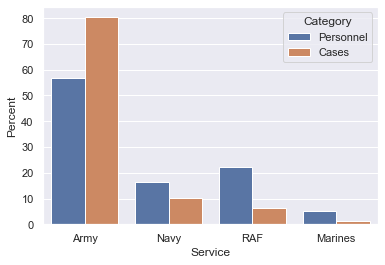

In [11]:
# Melt the data to be able to graph it tidily

data_df = personnel_df.melt('Service', var_name='Category', value_name='Percent')

# Plot the data

ax = sns.barplot(
    data= data_df,
    x= 'Service',
    y= 'Percent',
    hue='Category')

This indicates that the Army has a much higher court martial rate per soldier than any other service in particular the marines who have a very low rate of cases.

<b>Analysing the dates

In [12]:
# Concentrate on the month

dates_df = df['Sentencing Date'].apply(lambda x: x[5:7])

# Dropping a single freak date labelled differently

dates_df = dates_df.drop(labels=2963)

dates_df.unique()

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12'], dtype=object)

<AxesSubplot:xlabel='Sentencing Date', ylabel='count'>

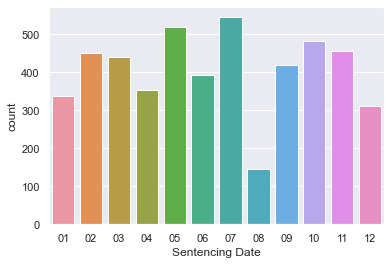

In [13]:
# Plot the data

sns.countplot(x=dates_df)

There seems to be an aversion to sentencing in August.